In [ ]:
# pip install tensorflow

## Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [2]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)


In [3]:
train=training_datagenarator.flow_from_directory(r'C:\Users\priya\Downloads\SatelliteForest\Data\Train',
                                                target_size=(256, 256),color_mode='grayscale',       
                                                 
                          class_mode='binary', batch_size=batch_size,subset='training')
validation=training_datagenarator.flow_from_directory(r'C:\Users\priya\Downloads\SatelliteForest\Data\Train',
                                                target_size=(256, 256),color_mode='grayscale',       
                                                 
                          class_mode='binary', batch_size=batch_size,subset='validation')

print(len(train))


Found 311 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
20


In [4]:
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [6]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\priya\Downloads\SatelliteForest\Data\model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [7]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=15,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

Epoch 1/15
19/19 [==============================] - 89s 4s/step - loss: 1.0572 - accuracy: 0.6237 - val_loss: 0.5676 - val_accuracy: 0.6875
Epoch 2/15
19/19 [==============================] - 63s 3s/step - loss: 0.3495 - accuracy: 0.8610 - val_loss: 0.5060 - val_accuracy: 0.6562
Epoch 3/15
19/19 [==============================] - 60s 3s/step - loss: 0.2657 - accuracy: 0.9017 - val_loss: 1.2534 - val_accuracy: 0.7188
Epoch 4/15
19/19 [==============================] - 68s 4s/step - loss: 0.2417 - accuracy: 0.9017 - val_loss: 2.0259 - val_accuracy: 0.8125
Epoch 5/15
19/19 [==============================] - 65s 3s/step - loss: 0.2450 - accuracy: 0.9085 - val_loss: 1.3049 - val_accuracy: 0.6875
Epoch 6/15
19/19 [==============================] - 75s 4s/step - loss: 0.2219 - accuracy: 0.8983 - val_loss: 0.9230 - val_accuracy: 0.6250
Epoch 7/15
19/19 [==============================] - 83s 4s/step - loss: 0.1520 - accuracy: 0.9356 - val_loss: 0.9097 - val_accuracy: 0.6562
Epoch 8/15
19/19 [==

In [8]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\priya\Downloads\SatelliteForest\Data\model.h5')

In [ ]:
#cnn.summary()

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [23]:
#non_fire
image_for_testing=r'C:\Users\priya\Downloads\SatelliteForest\Data\Test\0\01.png'

In [10]:
#Fire
image_for_testing=r'C:\Users\priya\Downloads\SatelliteForest\Data\Test\1\198.jpeg'

### Test images in CNN


1.0
fire is detetcted


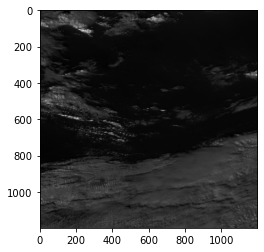

In [12]:
def testImage(image_for_testing):
    test_image=image.load_img(image_for_testing,target_size=(256,256,1),grayscale=True)
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    result=cnn.predict(test_image,batch_size=16,verbose=0)
    image_show=PIL.Image.open(image_for_testing)
    plt.imshow(image_show)
    print(result[0][0])
    if result[0][0]>0.5:
        #mail()
        print('fire is detetcted')
    else:
        print('fire is not detetcted')
testImage(image_for_testing)

## Mail forest fire unit 


In [13]:
def mail():
    import smtplib
    server=smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.login('kansamirtha2001@gmail.com','wzmnzbzxrlcaypac')
    server.sendmail('kansamirtha2001@gmail.com','amirthak08.lllcsea@gmail.com',"ALERT!!!A fire has been detected in the picture")
    server.quit()
    print('fire is detetcted')

## Testing and finding accuracy

In [14]:
testing_dir=r'C:\Users\priya\Downloads\SatelliteForest\Data\Test'

testing_datagen = ImageDataGenerator(rescale=1. / 255)
testing_generator = testing_datagen.flow_from_directory(
testing_dir,
target_size=(256, 256),
batch_size=batch_size,
shuffle=False,
    color_mode='grayscale',  
class_mode='binary')



Found 61 images belonging to 2 classes.


In [15]:
test_score = cnn.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_17532\1914845779.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = cnn.evaluate_generator(testing_generator, batch_size)


[INFO] accuracy: 91.80%
[INFO] Loss:  0.2660142183303833


## Getting Satellite Image


In [114]:
#pip install pystac_client

In [39]:
api_url = "https://earth-search.aws.element84.com/v0"
from pystac_client import Client

client = Client.open(api_url)

# collection: Sentinel-2, Level 2A, COGs
collection = "sentinel-s2-l2a-cogs"

# AMS coordinates
lat, lon = -3.465305, -42.215881
#lat, lon = -3.465305, -54.215881

geometry = {"type": "Point", "coordinates": (lon, lat)}

mysearch = client.search(
    collections=[collection],
    intersects=geometry,
    max_items=10,
)
print(mysearch.matched())

690


In [40]:
items = mysearch.get_all_items()
print(len(items))
for item in items:
    print(item)

10
<Item id=S2A_23MQS_20220615_0_L2A>
<Item id=S2A_23MRS_20220615_0_L2A>
<Item id=S2B_23MQS_20220610_0_L2A>
<Item id=S2B_23MRS_20220610_0_L2A>
<Item id=S2A_23MQS_20220605_0_L2A>
<Item id=S2A_23MRS_20220605_0_L2A>
<Item id=S2B_23MQS_20220531_0_L2A>
<Item id=S2B_23MRS_20220531_0_L2A>
<Item id=S2A_23MQS_20220526_0_L2A>
<Item id=S2A_23MRS_20220526_0_L2A>


In [41]:
assets = items[-1].assets  # last item's asset dictionary
print(assets.keys())
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])
thumbnail: Thumbnail
overview: True color image
info: Original JSON metadata
metadata: Original XML metadata
visual: True color image
B01: Band 1 (coastal)
B02: Band 2 (blue)
B03: Band 3 (green)
B04: Band 4 (red)
B05: Band 5
B06: Band 6
B07: Band 7
B08: Band 8 (nir)
B8A: Band 8A
B09: Band 9
B11: Band 11 (swir16)
B12: Band 12 (swir22)
AOT: Aerosol Optical Thickness (AOT)
WVP: Water Vapour (WVP)
SCL: Scene Classification Map (SCL)


In [139]:
print(assets["thumbnail"].href)

https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/23/M/RS/2022/5/21/0/preview.jpg


In [140]:
import urllib
urllib.request.urlretrieve(assets["thumbnail"].href, r"C:\Users\priya\Downloads\00232.jpg")

('C:\\Users\\priya\\Downloads\\00232.jpg',
 <http.client.HTTPMessage at 0x27dab3f0100>)

In [46]:
image_for_testing=r"C:\Users\priya\Downloads\00232.jpg"

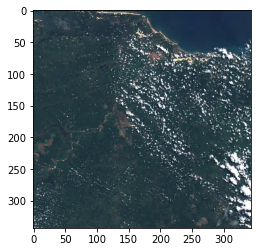

In [48]:
test_image=image.load_img(image_for_testing,target_size=(256,256,1),grayscale=True)
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image,batch_size=16,verbose=0)
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

In [49]:
if result[0][0]>0.5:
    mail()
else:
    print('fire is not detetcted')

fire is not detetcted


## Satellite image of forest fire

In [172]:
img = cv2.imread(r"C:\Users\priya\Downloads\PeatlandsFire.jpg", 0)
status = cv2.imwrite(r"C:\Users\priya\Downloads\B&WPeatlandsFire.jpg",img)

1.0

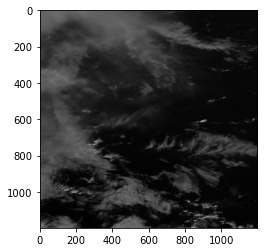

In [30]:
image_for_testing=r"C:\Users\priya\Downloads\New Folder\110.jpeg"
test_image=image.load_img(image_for_testing,target_size=(256,256,1),grayscale=True)
test_image=image.img_to_array(test_image)

test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image,batch_size=16,verbose=0)
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)
result[0][0]

In [31]:
print(result[0][0])
if (result[0][0])<0.5:
    print('fire is not detetcted')
else:
    print('fire is detetcted')

1.0
fire is detetcted


## Import necessary libraries

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [21]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(256,256,1)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [22]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [23]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\priya\Downloads\SatelliteForest\SVMmodel.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [24]:
model.fit(train,validation_data=validation,epochs=15)

Epoch 1/15
20/20 [==============================] - 98s 5s/step - loss: 0.9116 - accuracy: 0.6495 - val_loss: 0.7610 - val_accuracy: 0.6471
Epoch 2/15
20/20 [==============================] - 35s 2s/step - loss: 0.3223 - accuracy: 0.8650 - val_loss: 0.8916 - val_accuracy: 0.5294
Epoch 3/15
20/20 [==============================] - 35s 2s/step - loss: 0.2699 - accuracy: 0.8810 - val_loss: 0.9099 - val_accuracy: 0.6471
Epoch 4/15
20/20 [==============================] - 35s 2s/step - loss: 0.2441 - accuracy: 0.8875 - val_loss: 1.2399 - val_accuracy: 0.4706
Epoch 5/15
20/20 [==============================] - 35s 2s/step - loss: 0.1999 - accuracy: 0.9003 - val_loss: 0.7506 - val_accuracy: 0.5882
Epoch 6/15
20/20 [==============================] - 38s 2s/step - loss: 0.1580 - accuracy: 0.9196 - val_loss: 0.9290 - val_accuracy: 0.5588
Epoch 7/15
20/20 [==============================] - 39s 2s/step - loss: 0.1369 - accuracy: 0.9357 - val_loss: 0.9480 - val_accuracy: 0.5588
Epoch 8/15
20/20 [==

In [33]:
#Fire
image_for_testing=r'C:\Users\priya\Downloads\SatelliteForest\Data\Test\1\112.jpeg'


In [49]:
#non_fire
image_for_testing=r'C:\Users\priya\Downloads\SatelliteForest\Data\Test\0\089.png'


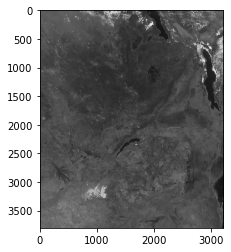

In [50]:
test_image=image.load_img(image_for_testing,target_size=(256,256,1),grayscale=True)
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image,batch_size=16,verbose=0)
image_show=PIL.Image.open(image_for_testing)
plt.figure(figsize=(4,4))

plt.imshow(image_show)

In [51]:
if result[0][0]>0:
    print('fire is detetcted')
    

elif result[0][0]<0:
    print('fire is not detetcted')

fire is not detetcted


## Accuracy for SVM


In [40]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\priya\AppData\Local\Temp\ipykernel_17532\3660475075.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(testing_generator, batch_size)


[INFO] accuracy: 91.80%
[INFO] Loss:  0.2813546657562256


## Testing using SVM

In [41]:
#83.75
image_for_testing=r"C:\Users\priya\Downloads\00232.jpg"

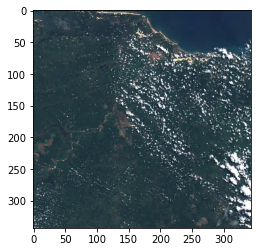

In [43]:
test_image=image.load_img(image_for_testing,target_size=(256,256,1),grayscale=True)
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image,batch_size=16,verbose=0)
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

In [44]:
result[0][0]

-6.1782494

In [45]:
if result[0][0]>0:
    print('fire is detetcted')
elif result[0][0]<0:
    print('fire is not detetcted')

fire is not detetcted
